# MA 755 - Assignment 2

by Neha, Katrina, Chengdong

## **1. Introduction**

## **2. Get the data**
    1. Set up the working directory
    2. Download and unzip the data file
    3. Take a quick look at the data structure
    4. Create a train set and a test set
  
## **3. Data discovery and visualisation**
    1. Box plot and histogram
    2. Examine the correlation

## **4. Prepare the data for Machine Learning algorithms**
    1. Train set data cleaning - imputing missing values
    2. Test set data cleaning - drop rows with missing values

## **5. Logistic Regression model**
    1. Training and fitting the logistic regression classfier 
    2. Model evaluation on the training set
    3. Model evaluation on the test set 

## **6. Decision tree**
    1. Training and fitting the deciion tree classfier  
    2. Plotting the decision tree
    3. Model evaluation on the test set  

## **7. SVM model**
    1. Training and fitting the non-linear SVM classfier
    2. Fitting the model
    3. Model evaluation on the training set
    4. Model evaluation on the test set
        
## **8. Comparing the performance of the models**
    1. Measuring accuracy using cross-validation
    2. Confusion matrix
    3. Precision and recall
    

## **9. Conclusion**

## 1. Introduction

The data we are working on is provided by the U.S department of Education. The data set contains information on College Scorecard, federal financial aid and students' earning records. The data set can help the students make informed educational choices by providing information on federal financial aid, school performance as well as students' long term career outcomes. The data set contains 1743 variables which are organized into 10 categories. The categories cover a broad range of topics such as school, academics, admissions, student, cost, repayment, completion and earnings.

Classification is one of the most widely used techniques in machine learning, with a broad array of applications, including sentiment analysis, ad targeting, spam detection, risk assessment, medical diagnosis and image classification. The core goal of this assignemnt is to implement different machine learning classification algorithms to predict a category or class of the " Level of institution" and " Type of Institution" from some inputs. 

The objectives for this assignment are stated below :
*  Train three different classification models - Logistic regression, Support Vector Machines and Decision Tree
*  Add a regularization term to the model to mitigate overfitting
*  Evaluate the performance of each model based on the performance measures to select the best model


## 2. Get the data

### *2.1. Set up the working directory *

The first step is to create a workspace. We import the `os` module. Next we us the `getcwd` method to return a string representing the current working directory. Then we use the `chdir` method to change the current working directory to path mentioned. Finally we confirm if our working directory is set to the one specified by calling `getcwd` metod again.

In [1]:
import os
os.getcwd() 

'C:\\Users\\Chengdong Liang\\Desktop\\MA-755-Assignment-2-master (1)\\MA-755-Assignment-2-master'

The above output tell us that our current working directory is 'C:\\Users\\Chengdong Liang\\Desktop\\MA-755-Assignment-2-master (1)\\MA-755-Assignment-2-master'

###  *2.2. Download and unzip the data file*

We import the `os` and `zipfile` modules to fetch our data which is in the form of a zipped file. Next we import the `urllib` module that is used to fetch URLs. `COLLEGE_URL` represents the URL for our data. `COLLEGE_PATH` is the directory created in our working space to downlaod and save the dataset.

`fetch_college_data` function has two paramaeters : `college_url` for the url of our dataset and `college_path` for the path in our working space where the data should be downloaded and saved.`makedirs` method is used to create the `datatsets/college` directory and setting `exist_ok` to True tells Python to not raise an error if the directory already exists.`os.path.join` method combines the name of the directory where the data is stored and the name of the data file to create an abosulte path to the datafile.

In [1]:
import os
import zipfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://ed-public-download.apps.cloud.gov/downloads/"
COLLEGE_PATH = "datasets/college"
COLLEGE_URL = DOWNLOAD_ROOT + "CollegeScorecard_Raw_Data.zip"

def fetch_college_data(college_url=COLLEGE_URL, college_path=COLLEGE_PATH):
    os.makedirs(college_path, exist_ok=True)
    zip_path = os.path.join(college_path, "Raw_Data.zip")
    urllib.request.urlretrieve(college_url, zip_path)
    college_zip = zipfile.ZipFile(zip_path)
    college_zip.extractall(path=college_path)
    college_zip.close()

Now we call the function `fetch_college_data`.

In [2]:
fetch_college_data()

It creates a `datasets/college` directory in the workspace, downloads the `CollegeScorecard_Raw_Data.zip` file and extracts all files from it in this directory.

The code below is the function to read in the csv file `MERGED2014_15_PP.csv` to a Pandas DataFrame.

In [3]:
import pandas as pd

DATA_PATH= "datasets/college/CollegeScorecard_Raw_Data"

def load_college_data(data_path=DATA_PATH):
    # `data_path` is relative to the directory containing this script
    csv_path = os.path.join(data_path, "MERGED2014_15_PP.csv")
    return pd.read_csv(csv_path, low_memory=False)

### *2.3 Take a quick look at the data structure*

Next we call the function `load_college_data` which returns a Pandas DataFrame and assign it to `college_original`. We also confirm its type and then look at the first five rows of the DataFrame `college_original` using the `head()` method

In [4]:
college_original = load_college_data()
print(type(college_original))
college_original.head()

<class 'pandas.core.frame.DataFrame'>


,﻿UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,NaN,0.0000,1044.0,NaN,NaN,1,0.4831,0.5169,1895.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,NaN,0.2408,1246.0,NaN,NaN,1,0.4169,0.5831,3937.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,0.0000,9.0,NaN,NaN,1,0.3986,0.6014,344.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,0.3477,765.0,NaN,NaN,1,0.5733,0.4267,1513.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,0.0000,1330.0,NaN,NaN,1,0.3877,0.6123,2137.0,NaN


The output tells us that `college_original` is a pandas Dataframe. Each row represents one college. There are 1743 attributes (columns). 

For further analysis, we need to subset this data set to include only our variables of interest.

### *2.4 Subsetting the data*

Based on the original dataset, a new dataframe is created, which includes the variables we mainly focus on:
* Dependent variables - 2
* Independent variables - 10

| **Variables** | **Description**      | **Type** | **Dependent/Independent**  |
| ------------- |:-------------:| -----------:|-----------:|
|CONTROL| Public or private institution |Categorical| Dependent|
|ICLEVEL| Level of institution |Categorical| Dependent|
|PCTFLOAN      | Rate of receiving federal loans | Numeric|Independent |
|PCTPELL      | Rate of receiving pell grant | Numeric|Independent |
| FEMALE      | Percentage of female students      | Numeric|  Independent |
| MARRIED | Percentage of married students|Numeric|   Independent |
| DEPENDENT |Percentage of married students     |Numeric|    Independent |
| VETERAN | Percentage of veteran students     |Numeric|   Independent |
|TUITFTE| Net tuition revenue per full-time student |Numeric| Independent|
|INEXPFTE|Instructional expenditures per full-time student |Numeric| Independent|
|DEP_INC_AVG|Average family income of dependent students |Numeric| Independent|
|IND_INC_AVG|Average family income of independent students |Numeric| Independent|

The subsetting of the DataFrame is done using square brackets and the names of the columns to be selected are placed inside the brackets. The selected columns are put in a new DataFrame called `college`.

Let's have a quick look at the first 5 rows of the DataFrame `college` by using the `head()` method.

In [5]:
college=college_original[['CONTROL','ICLEVEL','PCTFLOAN','PCTPELL','FEMALE','MARRIED', 'DEPENDENT', 'VETERAN',
                          'TUITFTE', 'INEXPFTE', 'DEP_INC_AVG', 'IND_INC_AVG' ]]
college.head()

,CONTROL,ICLEVEL,PCTFLOAN,PCTPELL,FEMALE,MARRIED,DEPENDENT,VETERAN,TUITFTE,INEXPFTE,DEP_INC_AVG,IND_INC_AVG
0,1,1,0.8284,0.7356,0.5262741999,0.0165942315,0.8704069538,PrivacySuppressed,9427.0,7437.0,33370.062501,9184.1313978
1,1,1,0.5214,0.3460,0.6323896753,0.1034554538,0.6883846794,0.0033305579,9899.0,17920.0,59212.341812,28786.1557
2,2,1,0.7795,0.6801,0.6465256798,0.2386706949,0.1057401813,PrivacySuppressed,12459.0,5532.0,30720.839981,18578.064211
3,1,1,0.4596,0.3072,0.4766449021,0.1320944249,0.6514314415,0.0090406831,8956.0,10211.0,67430.323934,25117.976718
4,1,1,0.7554,0.7347,0.6152291105,0.0097708895,0.8564690027,PrivacySuppressed,7733.0,7618.0,33576.943026,6974.2969861


From the first 5 rows of the data, we can observe that there are two variables (`CONTROL` and `ICLEVEL`) that have repetitive values, which indicates that these two variables might be categorical variables. 

Use the `value_counts()` method to have a closer look at these variables. This method gives us the frequency count for each of the unique values of the variable, arranged from highest to lowest.

In [6]:
college.iloc[:,0:2].apply(pd.Series.value_counts)

,CONTROL,ICLEVEL
1,2044,3281
2,1956,2249
3,3703,2173


The types and levels of the institutions represented by these values are listed below

|| **CONTROL** | **ICLEVEL**      
| ------------- |:-------------:| -----------:|-----------:|
|*1*| Public institutions |4-year institutions |
|*2*| Private nonprofit institutions |2-year institutions|
|*3*| Private for-profit institutions |Less-than-2-year institutions|

So we can see that there are 3703 Private for-profit institutions, 2044 Public institutions and  1956 Private for-profit institutions. In terms of level of institution, there are 3281 4-year institutions, 2249 2-year institutions and 2173 less-than-2-year institutions.

The code below uses the `info()` method to provide a concise summary of the DataFrame `college`

In [7]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 12 columns):
CONTROL        7703 non-null int64
ICLEVEL        7703 non-null int64
PCTFLOAN       6966 non-null float64
PCTPELL        6966 non-null float64
FEMALE         7497 non-null object
MARRIED        7497 non-null object
DEPENDENT      7497 non-null object
VETERAN        7497 non-null object
TUITFTE        7270 non-null float64
INEXPFTE       7270 non-null float64
DEP_INC_AVG    7497 non-null object
IND_INC_AVG    7497 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 722.2+ KB


The output tells us that the DataFrame `college` has 7703 observations. The names of the variables, the number of non-null values and the type are displayed as well. For instance, the variable `PCTFLOAN` has 6966 non-null values and is of type `float`.

From the general information, as shown above, it can be seen that the variables `FEMALE`, `MARRIED`, `DEPENDENT`, `VETERAN`, `DEP_INC_AVG`, `IND_INC_AVG` are not numeric. `CONTROL` and `ICLEVEL` should be categorical.Therefore, we need to change the type of these variables. 

`to_numeric()` method takes a Pandas series as input and converts it to numeric, coercing when told to by setting `errors` to `coerce`. `as.type(category)` allows us to convert a column to a categorical variable.

In [8]:
for col in college[['FEMALE', 'MARRIED', 'DEPENDENT', 'VETERAN', 'DEP_INC_AVG', 'IND_INC_AVG']]:
    college[col]= pd.to_numeric(college[col], errors='coerce')

for col in college[['CONTROL', 'ICLEVEL']]:
    college[col]= college[col].astype('category')

/Users/akhoury/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/akhoury/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Next we use the `info()` method to check whether the data type of these variables has been changed.

In [9]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 12 columns):
CONTROL        7703 non-null category
ICLEVEL        7703 non-null category
PCTFLOAN       6966 non-null float64
PCTPELL        6966 non-null float64
FEMALE         6354 non-null float64
MARRIED        6540 non-null float64
DEPENDENT      6947 non-null float64
VETERAN        3295 non-null float64
TUITFTE        7270 non-null float64
INEXPFTE       7270 non-null float64
DEP_INC_AVG    6963 non-null float64
IND_INC_AVG    6963 non-null float64
dtypes: category(2), float64(10)
memory usage: 617.0 KB


From the output, we can observe that all variables have been assigned the proper data type.

### *2.4 Create a train set and a test set*

Split the dataset into a train set train_set and a test set test_set. 80% of the data will be used as the training set (named `train_set`), and 20% used as the test set (named `test_set`).

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(college, test_size=0.2, random_state=42)

This gives us our training set `train_set` and our test set `test_set`.

## 3. Data discovery and visualisation

Create a copy of the training set to start exploring.

In [11]:
college = train_set.copy()

### *3.1 Box plot and histogram*

We first load the required libraries for visualization.

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

The code below gives the count of the number of each level of institution (`ICLEVEL`) for the type of institution (`CONTROL`).

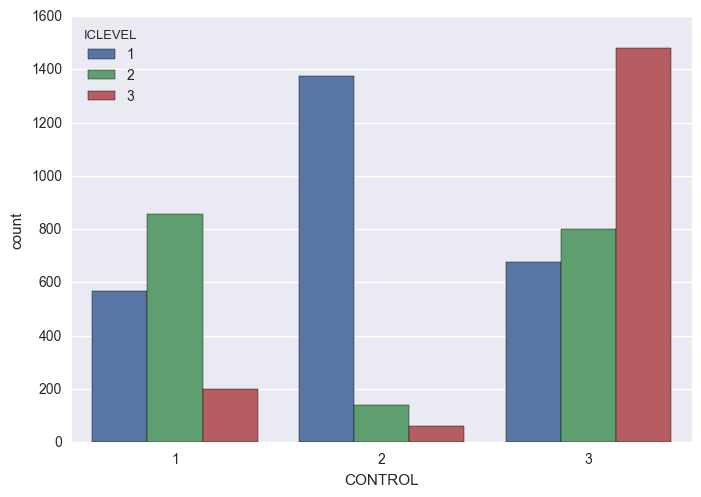

In [13]:
sns.countplot(x="CONTROL", hue="ICLEVEL", data=college);

According to the plot, most of the public colleges (`CONTROL`=1) provide 2-year level of education (`ICLEVEL`=2). Most of the private non-profit colleges (`CONTROL`=2) provide 4-year level of education(`ICLEVEL`=1). For the private for-profit (`CONTROL`=3), most offer less-than-2-year level of education(`ICLEVEL`=3).

The boxplot, as shown below, displays the distribution of variable `PCTFLOAN` and variable `PCTPELL` in each type of institution (that is, group by `CONTROL`).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fe19f60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fc6c2b0>], dtype=object)

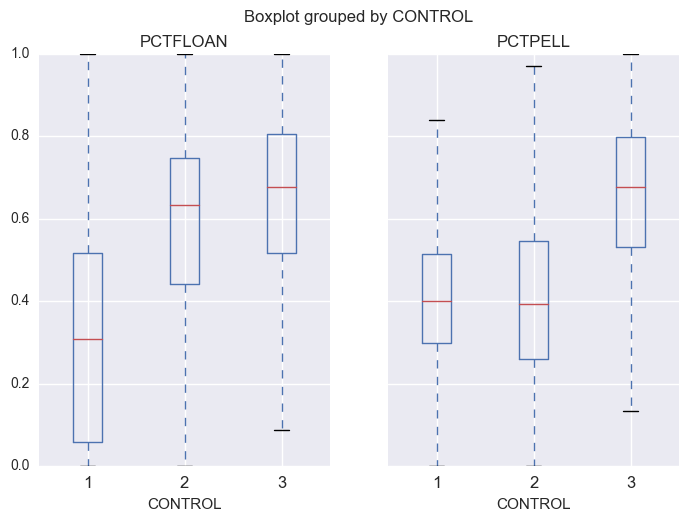

In [14]:
college.boxplot(column=["PCTFLOAN","PCTPELL"], by="CONTROL")

* From the first boxplot, we know that the rate of receiving federal loan is the lowest in the public institutions (`CONTROL`=1), and the rate of receiving federal loan is the highest in the private for-profit institutions (`CONTROL`=3).
* Unlike the first boxplot, the second boxplot shows that the private non-profit instutitions, instead of public institutions, has the lowest rate of receiving pell grand. The private for-profit institutions has the highest rate of receiving pell grand. 

The two boxplots, as shown below, demonstrate the distribution of variable `DEP_INC_AVG` (average family income of dependent students) and variable `IND_INC_AVG` (average family income of independent students) in each type of institution (that is, group by CONTROL).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12014b5f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12022ea90>], dtype=object)

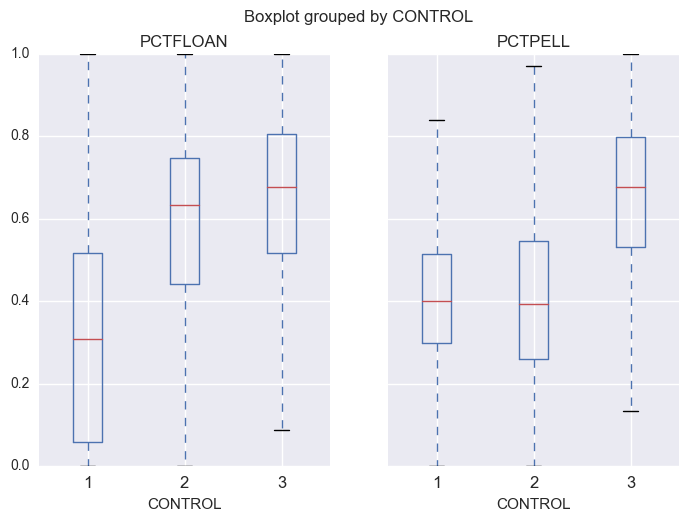

In [15]:
college.boxplot(column=["PCTFLOAN","PCTPELL"], by="CONTROL")

From both boxplots, we know that the average family income for both dependent students and independent students are the highest in the private non-profit institutions (`CONTROL`=2), and lowest in the private for-profit institutions (`CONTROL`=3).

Overall, the average family income for independent students are lower than the average family income for dependent students in each type of institution. 

The four sets of plots, as shown below, display the histogram of the percentage of female students, married students, dependent students and veterans, respectively, grouped by level and the type of institutions. 

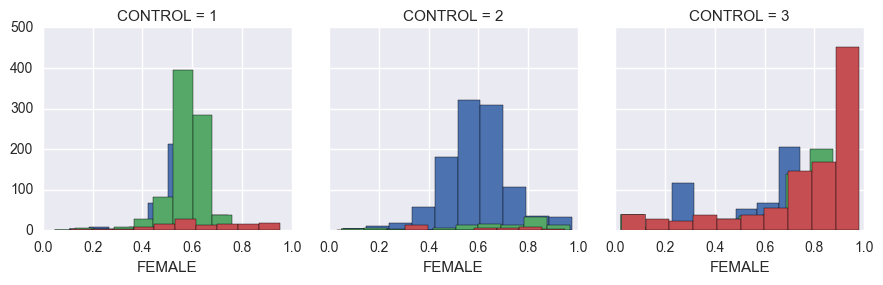

In [16]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "FEMALE");

From the histogram above, most of public colleges (`CONTROL` = 1) and private non-profit colleges (`CONTROL` = 2) have approximately 60% of female students while the range of percentage of females student in private for-profit colleges is between 70% and 100%. 

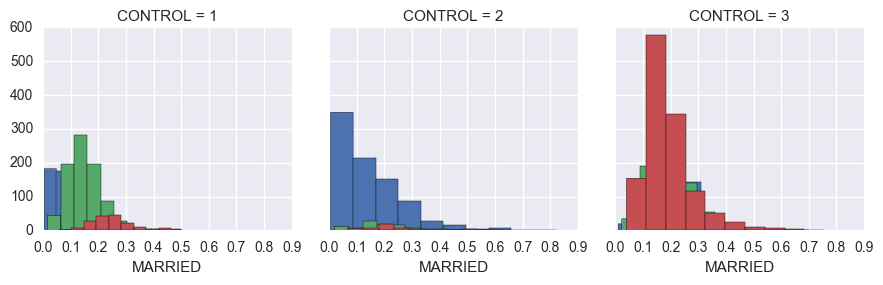

In [17]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "MARRIED");

From the histogram above, for public institutions (`CONTROL`=1), those that provide 2-year education and 4-year education have around 10% of married students while whose that provide less-than-2-year education have around 25% of married students. Most private non-profit schools provide 4-year education (`ICLEVEL`=1) and most of institutions in this type have less than 10% of married students. While, most private for-profit schools provide less-than-2-year education (`ICLEVEL`=3) and most institutions in this type have around 15% of married students. 

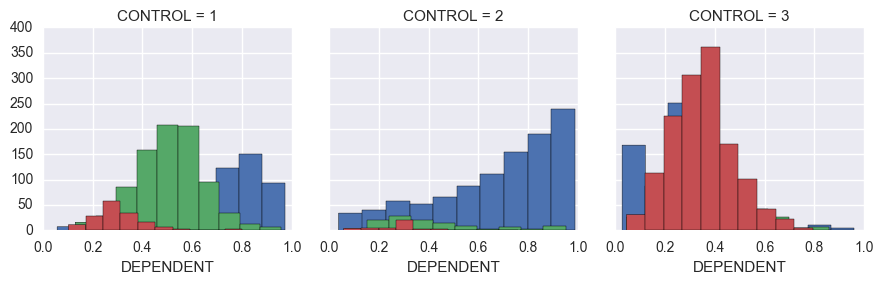

In [18]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "DEPENDENT");

From the histogram above, the private for-profit schools has the highest frequency of dependent students. For public institutions (`CONTROL`=1), most provide 2-year education. For this type of institutions, those with 2-year education have around 50% of dependent students, those with 4-year education have around 10% of dependent students and those with less-than-2-year education have around 80% of dependent students. Most private non-profit schools provide 4-year education while most private for-profit schools provide less-than-2-year education.

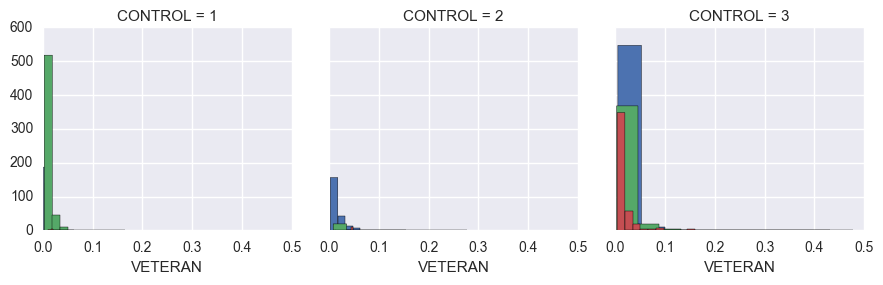

In [19]:
g = sns.FacetGrid(college, col="CONTROL",hue="ICLEVEL")
g.map(plt.hist, "VETERAN");

From the histogram above, the public and private non-profit schools have less than 0.5% of veterans while the average percentage of veterans in private for-profit schools have veterans is 0.5%. The public institutions that have veterans usually provide 2-year education and most private institutions that have veterans usually provide 4-year education. 

### *3.2 Examine the correlation*

We use the `corr()` method to compute pairwise correlation of columns, excluding NA/null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120e123c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122bf8e10>]], dtype=object)

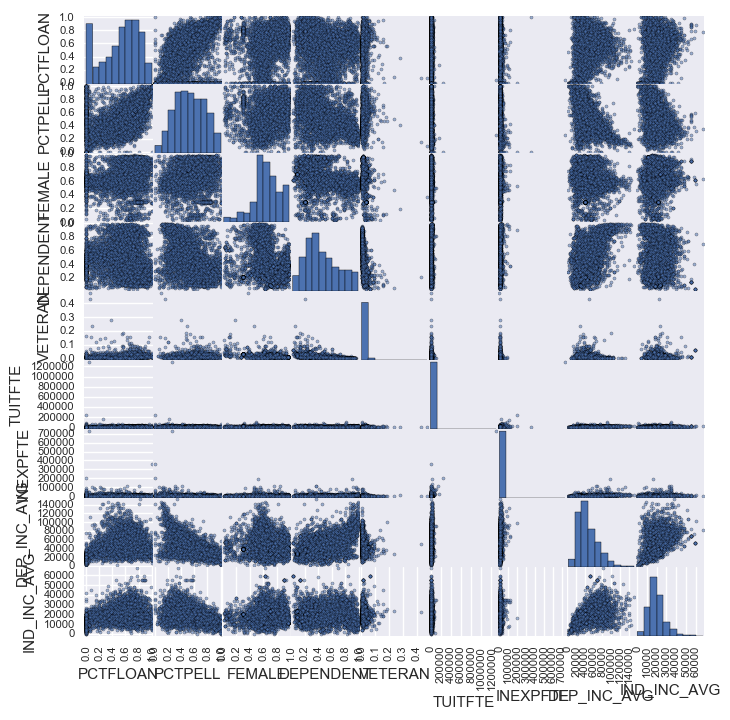

In [20]:
corr_matrix = college.corr()
from pandas.tools.plotting import scatter_matrix
attributes = ["PCTFLOAN","PCTPELL","FEMALE","DEPENDENT","VETERAN","TUITFTE","INEXPFTE","DEP_INC_AVG","IND_INC_AVG"]
scatter_matrix(college[attributes], figsize=(8, 8))

From the scatterplot matrix, as shown above, we obviously can capture two relationships between variables.
* `PCTFLOAN` and `PCTPELL` are positively correlated
* `DEP_INC_AVG` and `IND_INC_AVG` are positively correlated

Let's have a closer look at the relationships between `PCTFLOAN` (the rate of receiving federal loan) and `PCTPELL`(the rate of receiving pell grant). Different colors represent different types of institutions (`CONTROL`)

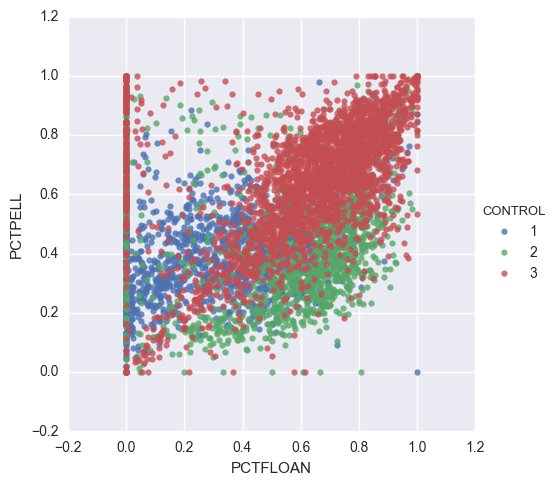

In [21]:
sns.lmplot("PCTFLOAN", "PCTPELL", data=college, fit_reg=False,hue="CONTROL")

The plot shows that, in general, there is a positive relationships between `PCTFLOAN` and `PCTPELL` for each type of institution, which indicates that the higher the rate of receiving federal loan, the higher the rate of receiving pell grant as well in the same institution; verse vice. However, some institutions does not offer federal loan no matter how high the rate of receiving pell grand in these institutions.  

## 4. Prepare the data for Machine Learning algorithms

We now create a new copy of the `train_set` and separate two target variables from independent variables. The DataFrame `college` contains the predictors,  and the DataFrame `college_type` has `CONTROL` and `ICLEVEL`. We confirm their dimensions.

In [22]:
college = train_set.drop(["CONTROL","ICLEVEL"], axis=1)
college_type = train_set[[ "CONTROL", "ICLEVEL"]].copy()
print(college.shape)
print(college_type.shape)

(6162, 10)
(6162, 2)


### *4.1 Train set data cleaning - imputing missing values*

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them. We compute the median value on the training set and use it to fill the missing values in the training set.

In [23]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

Then we use the `fit()` method to add `imputer` instance to the dataframe `college` which contains our independent variables. 

The `Imputer` class helps to impute missing values, either using mean, median or the most frequent value of the row or column where missing values are located.

In [24]:
imputer.fit(college)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Now, replace missing values by the computed medians in order to transform the training set:

In [25]:
X = imputer.transform(college)

Because the result is a Numpy array with transformed features. We can change the result to a Pandas DataFrame.

In [26]:
college_ind = pd.DataFrame(X, columns=college.columns)

In [27]:
college_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 10 columns):
PCTFLOAN       6162 non-null float64
PCTPELL        6162 non-null float64
FEMALE         6162 non-null float64
MARRIED        6162 non-null float64
DEPENDENT      6162 non-null float64
VETERAN        6162 non-null float64
TUITFTE        6162 non-null float64
INEXPFTE       6162 non-null float64
DEP_INC_AVG    6162 non-null float64
IND_INC_AVG    6162 non-null float64
dtypes: float64(10)
memory usage: 481.5 KB


The DataFrame has 6162 observations for each variable and no missing values as we have imputed all of them.

For the last step, we need to transform two target variables into 1d arrary in order to fit the model.

In [28]:
train_target_control = college_type[['CONTROL']].values.ravel()
train_target_iclevel = college_type[['ICLEVEL']].values.ravel()

### *4.2 Test set data cleaning - drop rows with missing value*

In order to evaluate the final model on the test set, we need to deal with missing values in the test set. Here we choose to drop observations in the test set with missing values

In [29]:
test_set_na = test_set.dropna().copy()

test_ind = test_set_na.drop(["CONTROL","ICLEVEL"], axis=1)
test_type = test_set_na[[ "CONTROL", "ICLEVEL"]].copy()

And then we need to transform two target variables into 1d arrary in order to fit the model in the test set.

In [30]:
test_target_control = test_set_na[['CONTROL']].values.ravel()
test_target_iclevel = test_set_na[['ICLEVEL']].values.ravel()

This gives us `test_target_control` as the test set for `CONTROL` variable and `test_target_iclevel` as the test set for `ICLEVEL` variable.

## 5. Logistic Regression
Load required libraries and functions that are used for the logistic regression.

In [31]:
import sklearn.linear_model    as sk_lm
import sklearn.multiclass      as sk_mc
import sklearn.model_selection as sk_ms
import sklearn.preprocessing   as sk_pp

from sklearn.linear_model    import SGDClassifier
from sklearn.metrics         import confusion_matrix
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import precision_score
from sklearn.preprocessing import StandardScaler

### 5.1 Training and fitting the model

#### Model for Variable `CONTROL`
Inside the pipeline, we create the classifier by using the LogisticRegression classifier and scale dataset to increase the accuracy.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
train_fit_control = Pipeline((
("scaler", StandardScaler()),
("log_clf", LogisticRegression(solver='liblinear',
                             random_state=42))
))

Based on the training set, we create the model, which means determine $\theta$.

In [33]:
train_fit_control.fit(college_ind, train_target_control)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))))

Calculate the predictions, that is, the predicted y equals to the round values of predicted probability.

In [34]:
train_predict_control  = train_fit_control.predict(college_ind)
test_predict_control  = train_fit_control.predict(test_ind)

Calculate the probabilities $\hat{p}$ by using the `predict_proba` method.

In [35]:
train_proba_control = train_fit_control.predict_proba(college_ind)
test_proba_control = train_fit_control.predict_proba(test_ind)

Find the decision scores by the `decision_function` method.

In [36]:
train_decision_control = train_fit_control.decision_function(college_ind)
test_decision_control = train_fit_control.decision_function(test_ind)

#### Model for Variable `ICLEVEL`

Since the steps are the same with those for the variable `CONTROL`, the following code is the simplied version of codes that were used above. 

In [37]:
train_fit_iclevel = Pipeline((
("scaler", StandardScaler()),
("log_clf", LogisticRegression(solver='liblinear',
                             random_state=42))
))
train_fit_iclevel.fit(college_ind, train_target_iclevel)

train_predict_iclevel  = train_fit_iclevel.predict(college_ind)
test_predict_iclevel  =  train_fit_iclevel.predict(test_ind)

train_decision_iclevel = train_fit_iclevel.decision_function(college_ind)
test_decision_iclevel = train_fit_iclevel.decision_function(test_ind)

### 5.2 Model evaluation on train set

#### 5.2.1 Confusion matrix

#### For target variable `CONTROL`

In [38]:
import sklearn.metrics as sk_me

control_log_pre= train_fit_control.predict(college_ind)

conf_mx_control=pd.DataFrame(sk_me.confusion_matrix(control_log_pre, 
                       college_type[['CONTROL']]))
conf_mx_control

,0,1,2
0,1379,220,95
1,126,919,147
2,121,436,2719


From the result, we know that 1379 observations are correctly assigned to class 0, 919 observations are correctly assigned to class 1 and 2719 observations are correctly assigned to class 2. 

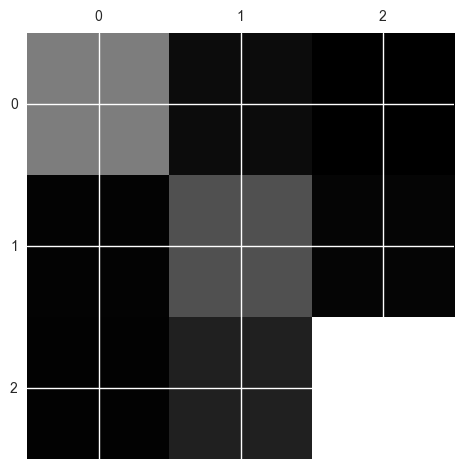

In [39]:
plt.matshow(conf_mx_control, cmap=plt.cm.gray)
plt.show()

The confusion matrix shows that the classifier performs well because most observations are on the main diagonal (the brighter the area is, the more observations that area have), which indicates those observations were classified to a right group.

The classifier performs best on classifying class 2, and second best on classifying class 0, and third best on classifying class 1.

#### For target variable `ICLEVEL`

In [40]:
iclevel_log_pre= train_fit_iclevel.predict(college_ind)

conf_mx_iclevel=pd.DataFrame(sk_me.confusion_matrix(iclevel_log_pre, 
                       college_type[['ICLEVEL']]))
conf_mx_iclevel

,0,1,2
0,2092,562,412
1,268,692,276
2,260,546,1054


From the result, we know that 2092 observations are correctly assigned to class 0, 692 observations are correctly assigned to class 1 and 1054 observations are correctly assigned to class 2. 

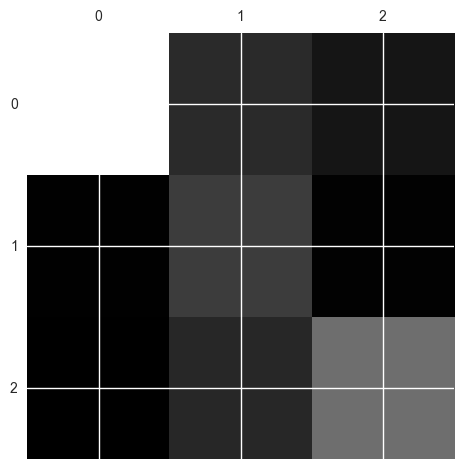

In [41]:
plt.matshow(conf_mx_iclevel, cmap=plt.cm.gray)
plt.show()

The confusion matrix shows that the classifier performs well because most observations are on the main diagonal (the brighter the area is, the more observations that area have), which indicates those observations were classified to a right group.

The classifier performs well on classifying class 0 and class 2 and not really well on classifying class 1. For the row of class 1, we can notice that the number of observations that should be class 1 were correctly classified is not much more than those that were misclassified, because the corresponding area is not obviously brighter than the other two areas on that row.

#### 5.2.2 Accuracy using cross-validation

The following code calculates the accuracy score when applying the model based on the training set to the test set for predicting the target categorical variable. 

However, the accuracy is not the preferred performance measure for classifiers, especially when dealing with datasets (that is, when some classes are much more frequent than others). Therefore, we usually use other evaluation methods such as confusion metric to evaluate the classifier.

#### For target variable `CONTROL`

In [42]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= train_fit_control,     # Model to test
                X= college_ind,  
                y = train_target_control,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.8023369   0.82327167  0.8067186 ]
Average accuracy:  0.810775722168


/Users/akhoury/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


From the result, we know that the average accuracy score is around 0.8108, indicating that around 81.08% of observations are correctly classified. Therefore, the classifier is not bad as a whole.

#### For target variable `ICLEVEL`

In [43]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= train_fit_iclevel,     # Model to test
                X= college_ind,  
                y = train_target_iclevel,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.61119221  0.63924051  0.60691671]
Average accuracy:  0.6191164759


From the result, we know that the average accuracy score is around 0.6191. It means that around 61.91% of observations were correctly classified, which indicates the classifier does not perform very well on classifying the this target variable `ICLEVEL`.

#### 5.2.3 Precision and Recall
* Precision: the accuracy of the positive predictions
* Recall: the percentage of positive instances that are correctly detected by the classifier (also called sensitivity or True Positive Rate) 

\begin{align}
    precision & = \frac{TP}{TP+FP}  = \frac{\text{correct positive predictions}}{\text{positive predictions}} 
\\  recall    & = \frac{TP}{TP+FN}  = \frac{\text{correct positive predictions}}{\text{actual positives}}
\end{align}

Since we have calculated the predicated classification of the target variable on test set, we can use the `sklearn.metrics` to find precision and recall as we as other relevant parameters such as f1-score and support to evaluate the classifier.

`Note`: f1-score - the harmonic mean of precision and recall. 
* The classifier will only get a high F1 score if both recall and precision are high

\begin{align}
    F_{1} & = \frac{2}{(\frac{1}{precision})(\frac{1}{recall})}  =2×\frac{precision×recall}{precision+recall}= \frac{TP}{TP+(\frac{FN+FP}{2})}
\end{align}

#### For target variable `CONTROL`

In [44]:
import sklearn.metrics         as sk_me
print(sk_me.classification_report(train_target_control, train_predict_control))

             precision    recall  f1-score   support

          1       0.81      0.85      0.83      1626
          2       0.77      0.58      0.66      1575
          3       0.83      0.92      0.87      2961

avg / total       0.81      0.81      0.81      6162



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 81% are correctly assigned |85% of actual class 1 are identified as class 1
|2| 77% are correctly assigned |58% of actual class 2 are identified as class 2
|3| 83% are correctly assigned |92% of actual class 3 are identified as class 3

As a whole, the classifier performs not bad on classifying the target variable `CONTROL`.

#### For target variable `ICLEVEL`

In [45]:
print(sk_me.classification_report(train_target_iclevel, train_predict_iclevel))

             precision    recall  f1-score   support

          1       0.68      0.80      0.74      2620
          2       0.56      0.38      0.46      1800
          3       0.57      0.61      0.59      1742

avg / total       0.61      0.62      0.61      6162



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 68% are correctly assigned |80% of actual class 1 are identified as class 1
|2| 56% are correctly assigned |38% of actual class 2 are identified as class 2
|3| 57% are correctly assigned |61% of actual class 3 are identified as class 3

As a whole, the classifier does not perform well on classifying the level of institution (`ICLEVEL`).

###  5.3 Model evaluation on the test set
#### 5.3.1 Confusion matrix
#### For target variable `CONTROL`
Since we have predicted the target variable in the test set by applying the model that is built on the training set, we can compare the predicted classification of our target variable and the actual classification to see whether the model fits well on the test set.

In [46]:
control_log_pre_test= train_fit_control.predict(test_ind)
pd.DataFrame(sk_me.confusion_matrix(control_log_pre_test, 
                       test_type[['CONTROL']]))

,0,1,2
0,215,4,1
1,14,24,11
2,9,25,288


From the result, we know that 215 observations are correctly assigned to class 0, 24 observations are correctly assigned to class 1 and 288 observations are correctly assigned to class 2. The classifier does not perform very well on classifying class 1 because there are around 49% of observations that should belong to class 1 are mis-classified. 

#### For target variable `ICLEVEL`

In [47]:
iclevel_log_pre_test= train_fit_iclevel.predict(test_ind)
pd.DataFrame(sk_me.confusion_matrix(iclevel_log_pre_test, 
                       test_type[['ICLEVEL']]))

,0,1,2
0,195,62,23
1,25,106,9
2,40,64,67


From the result, we know that 195 observations are correctly assigned to class 0, 106 observations are correctly assigned to class 1 and 67 observations are correctly assigned to class 2.

#### 5.3.2 Accuracy using cross-validation
#### For target variable `CONTROL`

In [48]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= train_fit_control,     # Model to test
                X= test_ind,  
                y = test_target_control,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.91919192  0.91370558  0.90306122]
Average accuracy:  0.911986242479


From the result, we know that the average accuracy score is around 0.9120, indicating that around 91.20% of observations are correctly classified on test set. Therefore, the classifier is fairly good as a whole.

#### For target variable `ICLEVEL`

In [49]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= train_fit_iclevel,     # Model to test
                X= test_ind,  
                y = test_target_iclevel,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.65656566  0.64974619  0.6377551 ]
Average accuracy:  0.648022317167


From the result, we know that the average accuracy score is around 0.6480. It means that around 64.80% of observations were correctly classified on test set, which indicates the classifier does not perform very well on classifying the this target variable `ICLEVEL`.

#### 5.3.3 Precision and Recall
#### For target variable `CONTROL`

In [50]:
print(sk_me.classification_report(test_target_control, test_predict_control))

             precision    recall  f1-score   support

          1       0.98      0.90      0.94       238
          2       0.49      0.45      0.47        53
          3       0.89      0.96      0.93       300

avg / total       0.89      0.89      0.89       591



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 98% are correctly assigned |90% of actual class 1 are identified as class 1
|2| 49% are correctly assigned |45% of actual class 2 are identified as class 2
|3| 89% are correctly assigned |96% of actual class 3 are identified as class 3

The classifier does not perform well on classifying the class 2 when applying to the test set.

#### For target variable `ICLEVEL`

In [51]:
print(sk_me.classification_report(test_target_iclevel, test_predict_iclevel))

             precision    recall  f1-score   support

          1       0.70      0.75      0.72       260
          2       0.76      0.46      0.57       232
          3       0.39      0.68      0.50        99

avg / total       0.67      0.62      0.62       591



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 70% are correctly assigned |75% of actual class 1 are identified as class 1
|2| 76% are correctly assigned |46% of actual class 2 are identified as class 2
|3| 39% are correctly assigned |68% of actual class 3 are identified as class 3

As a whole, the classifier does not perform very well on classifying the level of institution (`ICLEVEL`).

#### 5.3.4 Probabilities and ROC curve

ROC curve
* Definition: a plot about the True Positive Rate (also called Recall) against the False Positive Rate. 
* Property: the higher the True Positive Rate is, the more the false positive rate the classifier will produce. 
* The dotted line: means that the corresponding ROC curve is based on a purely random classifier. 
* How to evaluate: the further the ROC curve away from this line, the better the classifier will be. 

AUC:
* Definition: Area Under the ROC Curve 
* ROC AUC =1 for a perfect classifier 
* ROC AUC =0.5 for a purely random classifier

We have calculated the decision scores on test set, which named `test_decision_control` and `test_decision_iclevel` and we will use it to calcuate the ROC AUC.

#### For target variable `CONTROL`
Step 1: Binarize the output

In [52]:
from sklearn.preprocessing import label_binarize
y = label_binarize(test_target_control, classes=[0, 1, 2])
n_classes = y.shape[1]

Step 2: Compute ROC curve and ROC area 
* We need to first transform our target variable by using one-hot vector in order to calculate the ROC and AUC 

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_target_control_encoded = encoder.fit_transform(test_target_control)
test_target_control_encoded
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
test_target_control_1hot = encoder.fit_transform(test_target_control_encoded.reshape(-1,1))
test_target_control_1hot
test_target_control_1hot.toarray()
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
test_target_control_1hot = encoder.fit_transform(test_target_control)
test_target_control_1hot

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ..., 
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

* Compute ROC curve and ROC area for each class by using the for loop.

In [54]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_target_control_1hot[:, i], test_decision_control[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Step 3: aggregate all false positive rates

In [55]:
import numpy as np
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

Step 4: interpolate all ROC curves.

In [56]:
from scipy import interp
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

Step 5: Plot all ROC curves of three classes.

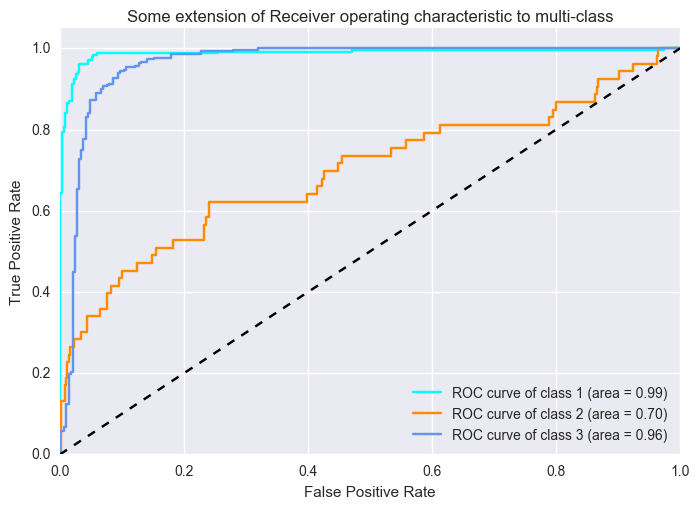

In [57]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

From the output, we know that the classifier did a good job when classifying class 1 and class 2 since both curves are at the left-top corner; however, it does not perform very well when classifying class 3 since it is closer to the dotted line.

#### For target variable `ICLEVEL`

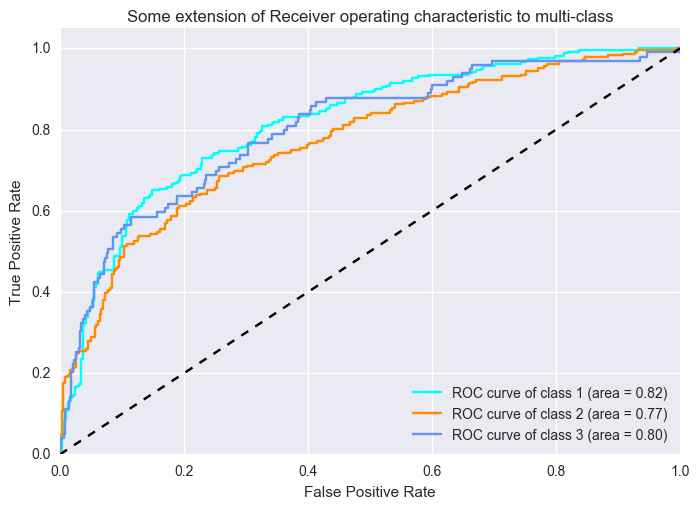

In [58]:
#Step 1
from sklearn.preprocessing import label_binarize
y = label_binarize(test_target_iclevel, classes=[0, 1, 2])
n_classes = y.shape[1]
#Step 2.1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_target_iclevel_encoded = encoder.fit_transform(test_target_iclevel)
test_target_iclevel_encoded
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
test_target_iclevel_1hot = encoder.fit_transform(test_target_iclevel_encoded.reshape(-1,1))
test_target_iclevel_1hot
test_target_iclevel_1hot.toarray()
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
test_target_iclevel_1hot = encoder.fit_transform(test_target_iclevel)
test_target_iclevel_1hot
#Step 2.2
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_target_iclevel_1hot[:, i], test_decision_iclevel[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#Step 3
import numpy as np
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
#Step 4
from scipy import interp
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
#Step 5
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

From the output, we know that the classifier perform fairly well on classifying the target variable `ICLEVEL` because all three ROC curves are only not very close to the left-corner but also not very close to the dotted line; therefore, I would say that the classifier is not bad.

## 6. Decision tree
Load required libraries and functions that are used for the Decision Tree.

In [59]:
import numpy             as np
import pandas            as pd

%matplotlib inline
import matplotlib        as mpl
import matplotlib.pyplot as plt
import pydotplus         as pdp
import seaborn           as sea

import sklearn.metrics         as sk_me
import sklearn.model_selection as sk_ms
import sklearn.linear_model    as sk_lm
import sklearn.preprocessing   as sk_pp
import sklearn.multiclass      as sk_mc
import sklearn.datasets        as sk_ds
import sklearn.tree            as sk_dt
import sklearn.pipeline        as sk_pl
import sklearn.svm             as sk_sv
import sklearn.neighbors       as sk_nb

import scipy.stats             as sp_st
import IPython.display         as ip_d
import pickle                  as pickle

Then we separate the dataset into `college` containing the predictors, `college_target_control` containing the target variable `CONTROL` and `college_target_iclevel` containing the target variable `ICLEVEL`.

### 6.1 Train and fit Decision Tree classifier

#### Model for Variable `CONTROL`

We first train a Decision Tree classifer for target variable `CONTROL`. The `min_samples_split` is set to 1200 to ensure that the split only occurs when there are more than 1200 observations. This reduces the chances of the tree becoming very large.

In [104]:
dt_control  = sk_dt.DecisionTreeClassifier(min_samples_split=1200,random_state=42)

Next we fit the classifier to the training data.

In [105]:
dt_control.fit(college_ind, train_target_control)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=1200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

The following code makes the predictions for `CONTROL` target variable.

In [106]:
train_predict_control  = dt_control.predict(college_ind)
test_predict_control  = dt_control.predict(test_ind)

Then we calculate the predicted probabilities for the predictions.

In [107]:
train_proba_control = dt_control.predict_proba(college_ind)
test_proba_control = dt_control.predict_proba(test_ind)

#### Model for Variable `ICLEVEL`

We now train a Decision Tree classifer for target variable `ICLEVEL`.

In [109]:
dt_iclevel  = sk_dt.DecisionTreeClassifier(min_samples_split=1200,random_state=42)

In [110]:
dt_iclevel.fit(college_ind, train_target_iclevel)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=1200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [111]:
train_predict_iclevel  = dt_iclevel.predict(college_ind)
test_predict_iclevel  = dt_iclevel.predict(test_ind)

In [112]:
train_proba_iclevel = dt_iclevel.predict_proba(college_ind)
test_proba_iclevel = dt_iclevel.predict_proba(test_ind)

###  6.2 Plotting decision tree

#### Tree Graph for Variable `CONTROL`

2017-03-31 02:35:40.547 dot[9285:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-31 02:35:40.549 dot[9285:507] CoreText performance note: Set a breakpoint on CTFontLogSuboptimalRequest to debug.
2017-03-31 02:35:40.699 dot[9285:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-31 02:35:40.699 dot[9285:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-31 02:35:40.700 dot[9285:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostSc

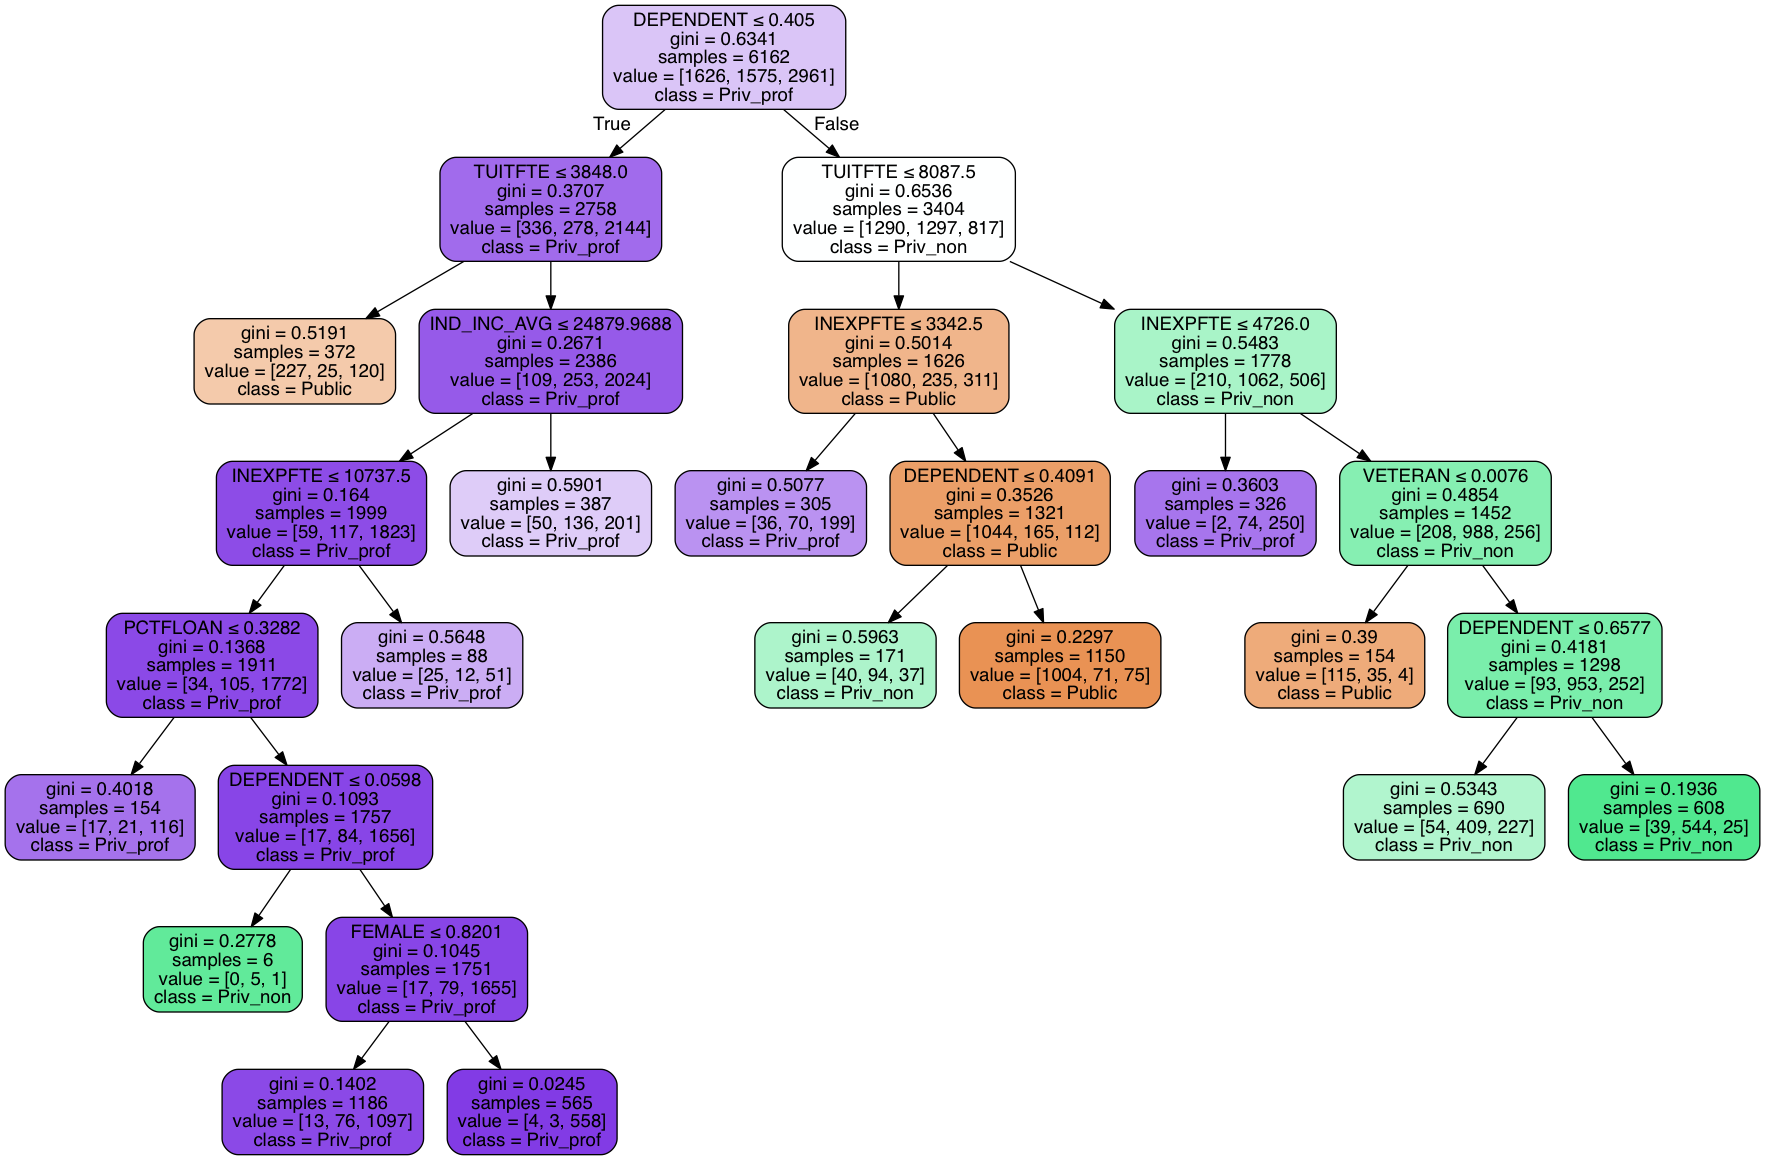

In [108]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import pydotplus
graph = sk_dt.export_graphviz(dt_control, 
                              out_file=None, 
                              feature_names=['PCTFLOAN','PCTPELL','FEMALE','MARRIED', 'DEPENDENT', 'VETERAN',
                          'TUITFTE', 'INEXPFTE', 'DEP_INC_AVG', 'IND_INC_AVG' ],  
                              class_names=['Public','Priv_non','Priv_prof'],  
                              filled=True, 
                              rounded=True,  
                              special_characters=True)
                               

    
gif= pydotplus.graph_from_dot_data(graph)
Image(gif.create_png())

#### Tree Graph for Variable `ICLEVEL`

2017-03-31 02:39:21.370 dot[9287:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-31 02:39:21.371 dot[9287:507] CoreText performance note: Set a breakpoint on CTFontLogSuboptimalRequest to debug.
2017-03-31 02:39:21.539 dot[9287:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-31 02:39:21.540 dot[9287:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostScript name "Helvetica". For best performance, only use PostScript names when calling this API.
2017-03-31 02:39:21.540 dot[9287:507] CoreText performance note: Client called CTFontCreateWithName() using name "helvetica" and got font with PostSc

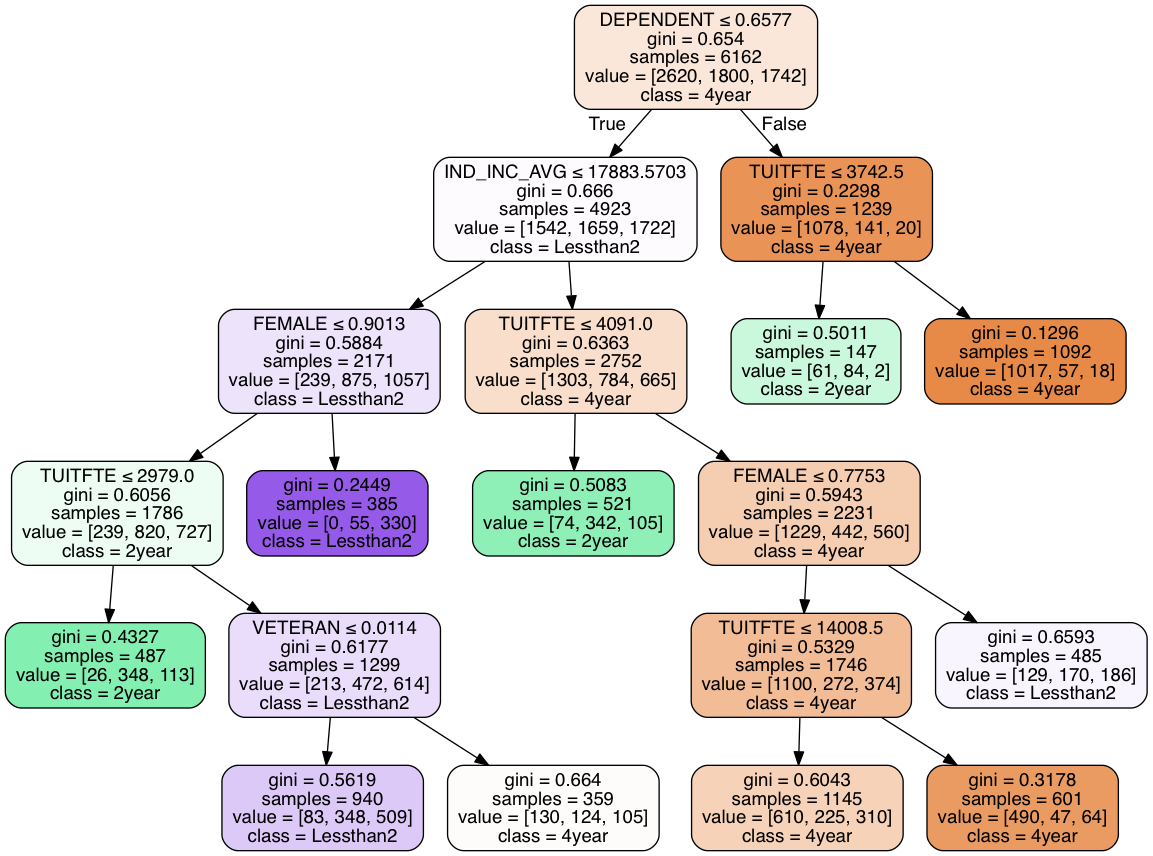

In [113]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import pydotplus
graph = sk_dt.export_graphviz(dt_iclevel, 
                              out_file=None, 
                              feature_names=['PCTFLOAN','PCTPELL','FEMALE','MARRIED', 'DEPENDENT', 'VETERAN',
                          'TUITFTE', 'INEXPFTE', 'DEP_INC_AVG', 'IND_INC_AVG' ],  
                             class_names=['4year','2year','Lessthan2'], 
                              filled=True, 
                              rounded=True,  
                              special_characters=True)
                               

    
gif= pydotplus.graph_from_dot_data(graph)
Image(gif.create_png())

###  6.3 Model evaluation on the test set

#### 6.3.1 Confusion matrix
#### For target variable `CONTROL`

In [114]:
control_dt_pre_test = dt_control.predict(test_ind)
pd.DataFrame(sk_me.confusion_matrix(control_dt_pre_test, test_type[['CONTROL']]))

,0,1,2
0,218,7,11
1,3,14,9
2,17,32,280


From the confusion matrix, we know that 218 observations are correctly assigned to class 0, 14 observations are correctly assigned to class 1 and 280 observations are correctly assigned to class 2.

#### For target variable `ICLEVEL`

In [115]:
iclevel_dt_pre_test= dt_iclevel.predict(test_ind)
pd.DataFrame(sk_me.confusion_matrix(iclevel_dt_pre_test, test_type[['ICLEVEL']]))

,0,1,2
0,223,69,39
1,19,118,4
2,18,45,56


The confusion matrix for `ICLEVEL` shows that 223 observations are correctly assigned to class 0, 118 observations are correctly assigned to class 1 and 56 observations are correctly assigned to class 2.

#### 6.3.2 Accuracy using cross-validation
#### For target variable `CONTROL`

In [116]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= dt_control,     
                X= test_ind,  
                y = test_target_control,      
                scoring = "accuracy",               
                cv=3)                              

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.50505051  0.50761421  0.51020408]
Average accuracy:  0.507622933294


From the result, we know that the average accuracy score is around 0.508, indicating that around 50.8% of observations are correctly classified. Therefore, the classifier is not performing well for `CONTROL`

#### For target variable `ICLEVEL`

In [117]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= dt_iclevel,     
                X= test_ind,  
                y = test_target_iclevel,      
                scoring = "accuracy",               
                cv=3)                              

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.43939394  0.44162437  0.43877551]
Average accuracy:  0.439931271693


The result tells us that the average accuracy score is around 0.44, indicating that around 44% of observations are correctly classified. Therefore, the classifier for `ICLEVEL` is performing worse than `CONTROL`.

#### 6.3.3 Precision and Recall
#### For target variable `CONTROL`

In [118]:
print(sk_me.classification_report(test_target_control, test_predict_control))

             precision    recall  f1-score   support

          1       0.92      0.92      0.92       238
          2       0.54      0.26      0.35        53
          3       0.85      0.93      0.89       300

avg / total       0.85      0.87      0.85       591



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 92% are correctly assigned |92% of actual class 1 are identified as class 1
|2| 54% are correctly assigned |26% of actual class 2 are identified as class 2
|3| 85% are correctly assigned |93% of actual class 3 are identified as class 3

The classifier does not perform well on classifying the class 2 ( Public non-profit institutions)when applied to the test set.

#### For target variable `ICLEVEL`

In [119]:
print(sk_me.classification_report(test_target_iclevel, test_predict_iclevel))

             precision    recall  f1-score   support

          1       0.67      0.86      0.75       260
          2       0.84      0.51      0.63       232
          3       0.47      0.57      0.51        99

avg / total       0.70      0.67      0.67       591



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 67% are correctly assigned |86% of actual class 1 are identified as class 1
|2| 84% are correctly assigned |51% of actual class 2 are identified as class 2
|3| 47% are correctly assigned |57% of actual class 3 are identified as class 3

On the whole, the Decision Tree classifier performs better on classifying the level of institution (`ICLEVEL`) than on the other target variable `CONTROL`.

## 7. Non-linear SVM model 
### 7.1 Training on the training set

Firstly we need to transform two target variables into 1d arrary in order to fit the model: 

Because Linear SVC does not support multilable classification, we would choose non-lieanr SVC. We go with the **Gaussian RBF kernel** using the SVC class.

In addition to Polynomial kernel, we could add similarity features as the technique to tackle non-linear problems. This method add features computed using a similarity function, which is Gaussian *Radial Basis Function*(RBF) here.

#### 7.1.1 Logarithmic grid search of hypterparameters

Two key hypterparameters of the model are `gamma` and `C`. Here we use stratified K-fold crossvalidation to set `C` and `gamma`. We use a logarithmic grid for both parameters.

For an initial search, a logarithmic grid with basis 10 is often helpful. Using a basis of 2, a finer tuning can be achieved but at a much higher cost.

The range we set here is:
* `C`: 0.001~1000
* `gamma`: 0.01~100

#### For target variable `CONTROL`

In [120]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

C_range = 10. ** np.arange(-3, 3)
gamma_range = 10. ** np.arange(-2, 2)

param_grid = dict(gamma=gamma_range, C=C_range)

grid_control = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(y=train_target_control, n_folds =5))

grid_control.fit(college_ind, train_target_control)

grid_control.best_params_

{'C': 10.0, 'gamma': 10.0}

#### For target variable `ICLEVEL`

In [121]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

C_range = 10. ** np.arange(-3, 3)
gamma_range = 10. ** np.arange(-2, 2)

param_grid = dict(gamma=gamma_range, C=C_range)

grid_iclevel = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(y=train_target_iclevel, n_folds =5))

grid_iclevel.fit(college_ind, train_target_iclevel)

grid_iclevel.best_params_

{'C': 10.0, 'gamma': 10.0}

#### 7.1.2 Fitting the model

#### SVM model of `CONTROL`

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rbf_svm_control = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=10, C=10))
))

rbf_svm_control.fit(college_ind, train_target_control)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

#### SVM model of `ICLEVEL`

In [123]:
rbf_svm_iclevel = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=10, C=10))
))

rbf_svm_iclevel.fit(college_ind, train_target_iclevel)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

### 7.2 Model evaluation on the train set
#### 7.2.1 Confusion matrix

#### For target variable `CONTROL`

In [124]:
import sklearn.metrics as sk_me

control_svm_pre= rbf_svm_control.predict(college_ind)
pd.DataFrame(sk_me.confusion_matrix(control_svm_pre, 
                       college_type[['CONTROL']]))

,0,1,2
0,1625,0,0
1,1,1572,16
2,0,3,2945


From the result, we know that 1625 observations are correctly assigned to class 0, 1572 observations are correctly assigned to class 1 and 2945 observations are correctly assigned to class 2. 

#### For target variable `ICLEVEL`

In [125]:
iclevel_svm_pre= rbf_svm_iclevel.predict(college_ind)
pd.DataFrame(sk_me.confusion_matrix(iclevel_svm_pre, 
                       college_type[['ICLEVEL']]))

,0,1,2
0,2619,6,3
1,1,1789,1
2,0,5,1738


From the result, we know that 2619 observations are correctly assigned to class 0, 1789 observations are correctly assigned to class 1 and 1738 observations are correctly assigned to class 2. 

#### 7.2.2 Accuracy using cross-validation

#### For target variable `CONTROL`

In [126]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= rbf_svm_control,     # Model to test
                X= college_ind,  
                y = train_target_control,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.6134372   0.593963    0.59883155]
Average accuracy:  0.602077247647


From the result, we know that the average accuracy score is around 0.6021, indicating that around 61.21% of observations are correctly classified. Therefore, the classifier is not so good.

#### For target variable `ICLEVEL`

In [127]:
scores = cross_val_score(estimator= rbf_svm_iclevel,     # Model to test
                X= college_ind,  
                y = train_target_iclevel,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.60145985  0.5647517   0.57135899]
Average accuracy:  0.579190181618


From the result, we know that the average accuracy score is around 0.5792. It means that around 57.92% of observations were correctly classified, which indicates the classifier does not perform very well on classifying the this target variable `ICLEVEL`.

#### 7.2.3 Precision and Recall

#### For target variable `CONTROL`

In [128]:
from sklearn.metrics import precision_score
print(sk_me.classification_report(train_target_control, control_svm_pre))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00      1626
          2       0.99      1.00      0.99      1575
          3       1.00      0.99      1.00      2961

avg / total       1.00      1.00      1.00      6162



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1|100% are correctly assigned |100% of actual class 1 are identified as class 1
|2| 99% are correctly assigned |100% of actual class 2 are identified as class 2
|3| 100% are correctly assigned |99% of actual class 3 are identified as class 3

As a whole, the classifier performs extremely excellent on classifying the target variable `CONTROL`.

#### For target variable `ICLEVEL`

In [129]:
print(sk_me.classification_report(train_target_iclevel, iclevel_svm_pre))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00      2620
          2       1.00      0.99      1.00      1800
          3       1.00      1.00      1.00      1742

avg / total       1.00      1.00      1.00      6162



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1|100% are correctly assigned |100% of actual class 1 are identified as class 1
|2| 100% are correctly assigned |99% of actual class 2 are identified as class 2
|3| 100% are correctly assigned |100% of actual class 3 are identified as class 3

the classifier performs extremely excellent on classifying the target variable classifying the level of institution (`ICLEVEL`).

### 7.3 Model evaluation on the test set

#### 7.3.1 Confusion matrix
#### For target variable `CONTROL`

In [130]:
control_svm_pre_test= rbf_svm_control.predict(test_ind)
pd.DataFrame(sk_me.confusion_matrix(control_svm_pre_test, 
                       test_type[['CONTROL']]))

,0,1,2
0,123,0,0
1,0,13,0
2,115,40,300


From the result, we know that 123 observations are correctly assigned to class 0, 13 observations are correctly assigned to class 1 and 300 observations are correctly assigned to class 2. The classifier does not perform very well on classifying class 0.Nearly 50% of observations that should belong to class 0 are mis-classified. 

#### For target variable `ICLEVEL`

In [131]:
iclevel_svm_pre_test= rbf_svm_iclevel.predict(test_ind)
pd.DataFrame(sk_me.confusion_matrix(iclevel_svm_pre_test, 
                       test_type[['ICLEVEL']]))

,0,1,2
0,247,103,34
1,13,112,4
2,0,17,61


From the result, we know that 247 observations are correctly assigned to class 0, 112 observations are correctly assigned to class 1 and 61 observations are correctly assigned to class 2.

#### 7.3.2 Accuracy using cross-validation
#### For target variable `CONTROL`

In [132]:
scores = cross_val_score(estimator= rbf_svm_control,     # Model to test
                X= test_ind,  
                y = test_target_control,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.54040404  0.53299492  0.53571429]
Average accuracy:  0.536371083325


From the result, we know that the average accuracy score is around 0.5364, indicating that around 53.64% of observations are correctly classified on test set. Therefore, the classifier is not so good as a whole.

#### For target variable `ICLEVEL`

In [133]:
scores = cross_val_score(estimator= rbf_svm_iclevel,     # Model to test
                X= test_ind,  
                y = test_target_iclevel,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=3)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.48989899  0.49746193  0.53061224]
Average accuracy:  0.505991054577


From the result, we know that the average accuracy score is around 0.5060. It means that around 50.60% of observations were correctly classified on test set, which indicates the classifier does not perform very well on classifying the this target variable `ICLEVEL`.

#### 7.3.3 Precision and Recall
#### For target variable `CONTROL`

In [134]:
print(sk_me.classification_report(test_target_control, control_svm_pre_test))

             precision    recall  f1-score   support

          1       1.00      0.52      0.68       238
          2       1.00      0.25      0.39        53
          3       0.66      1.00      0.79       300

avg / total       0.83      0.74      0.71       591



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 100% are correctly assigned |52% of actual class 1 are identified as class 1
|2| 100% are correctly assigned |25% of actual class 2 are identified as class 2
|3| 66% are correctly assigned |100% of actual class 3 are identified as class 3

The classifier performance is not as well as before in the train set when it comes to the test set.

#### For target variable `ICLEVEL`

In [135]:
print(sk_me.classification_report(test_target_iclevel, iclevel_svm_pre_test))

             precision    recall  f1-score   support

          1       0.64      0.95      0.77       260
          2       0.87      0.48      0.62       232
          3       0.78      0.62      0.69        99

avg / total       0.75      0.71      0.70       591



The following table is the summary and interpretations based on the result above:

| **Class** | **Precision**      | **Recall** 
| ------------- |:-------------:| -----------:
|1| 64% are correctly assigned |95% of actual class 1 are identified as class 1
|2| 87% are correctly assigned |48% of actual class 2 are identified as class 2
|3| 78% are correctly assigned |62% of actual class 3 are identified as class 3

As a whole, the classifier does not perform very well on classifying the level of institution (`ICLEVEL`).

## 8. Comparing the performance of the models

The following table is the summary of all models with different evaluation index.

#### For target variable `CONTROL`

| **Model** | **Accuarcy**| **Precision**  | **Recall** |**f1-score**
| ------------- |:-------------:| -----------:| -----------:|-----------:
|Logistic Regression| 0.9120|0.89    |  0.89 |0.89|
|Decision Tree| 0.507 | 0.85|0.87 |0.85| 
|SVM| 0.5364 | 0.83| 0.74|0.71 |

#### For target variable `ICLEVEL`

| **Model** | **Accuarcy**| **Precision**  | **Recall** |**f1-score**
| ------------- |:-------------:| -----------:| -----------:|-----------:|-----------:
|Logistic Regression| 0.6480|0.67|0.62|0.62
|Decision Tree| 0.44 |0.70 |0.67 |0.67 | 
|SVM|0.5060  | 0.75|0.71 | 0.70| 



## 9. Conclusion